   Unnamed: 0  SeriousDlqin2yrs  ...  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
0           1                 1  ...                                     0                   2
1           2                 0  ...                                     0                   1
2           3                 0  ...                                     0                   0
3           4                 0  ...                                     0                   0
4           5                 0  ...                                     0                   0

[5 rows x 12 columns]


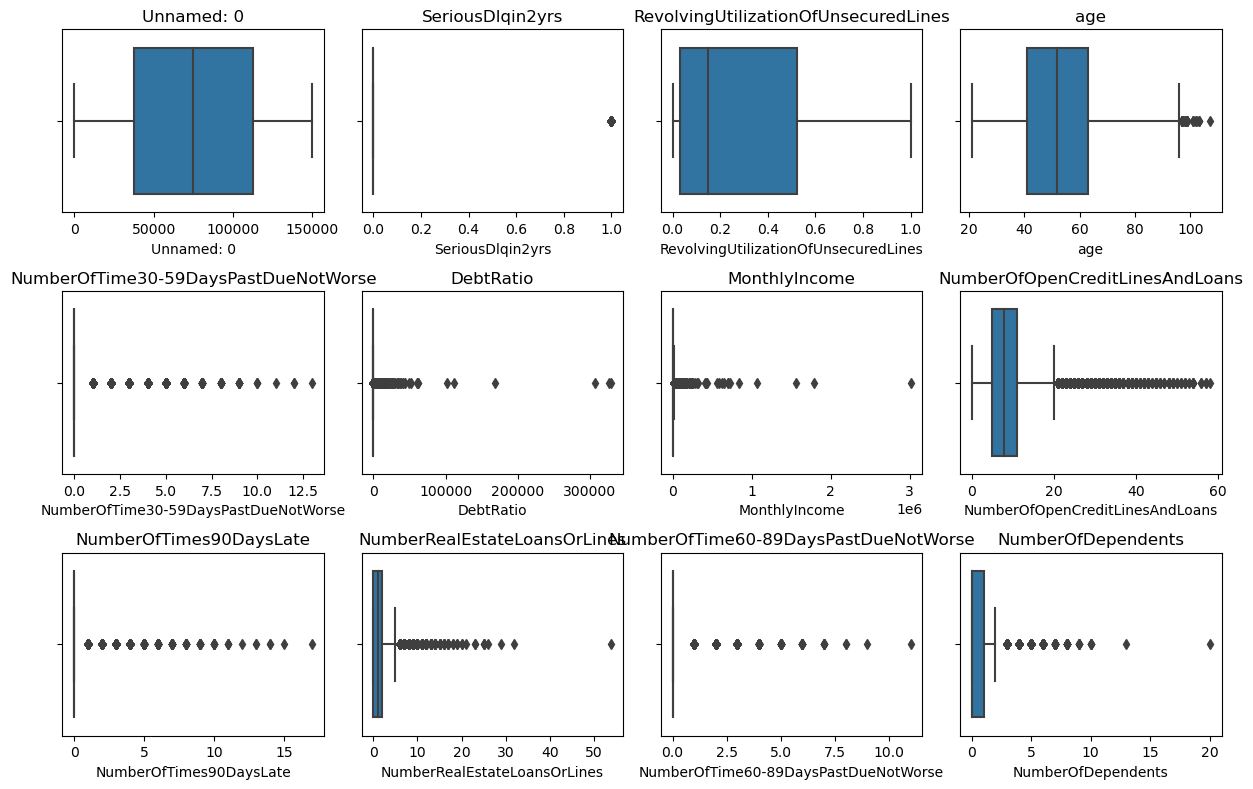

删除的重复行数: 3
训练数据形状: (61105, 11)
测试数据形状: (15277, 11)


In [5]:
import pandas as pd

# 加载数据

# data = __________
data = pd.read_csv('finance数据集.csv')

# 显示前五行的数据

# __________
print(data.head())

import matplotlib.pyplot as plt
import seaborn as sns

# 设置图像尺寸
plt.figure(figsize=(12, 8))

# 识别数值列用于箱线图
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# 创建箱线图
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# 使用IQR处理异常值

# Q1 = __________(0.25)
# Q3 = __________(0.75)
# IQR = __________
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# 移除异常值

# data_cleaned = data[~((data[numeric_cols] < (Q1 - 1.5 * __________)) | (data[numeric_cols] > (Q3 + 1.5 * __________))).any(axis=1)]
data_cleaned = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 检查处理重复值

# duplicates = __________()
duplicates = data_cleaned.duplicated()

num_duplicates = duplicates.sum()
data_cleaned = data_cleaned[~duplicates]

print(f'删除的重复行数: {num_duplicates}')

#对数据进行归一化处理
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# data_cleaned[numeric_cols] = __________
data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

# 设定目标变量
# target_variable = __________
target_variable = 'SeriousDlqin2yrs'  # target_variable = data_cleaned['SeriousDlqin2yrs']

from sklearn.model_selection import train_test_split

# 定义特征和目标

# X = __________(columns=[__________])   #1分
# y = __________                         #1分
X = data_cleaned.drop(columns=[target_variable])   #1分  To Do
y = data_cleaned[target_variable]                  #1分

# 划分数据（训练集占80%）

# X_train, X_test, y_train, y_test = __________(__________, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# 显示划分后的数据形状
print(f'训练数据形状: {X_train.shape}')
print(f'测试数据形状: {X_test.shape}')

# 保存清洗后的数据到CSV
cleaned_file_path = '2.1.3_cleaned_data.csv'

# __________(__________, index=False)
data_cleaned.to_csv(cleaned_file_path, index=False) # To Do
